## Tutorial 5 - 1D Poisson Equation Solution ##
In this tute, we're going to practice implementing a solution to the 1D Poisson equation. Please ensure you watch the [lecture](https://youtu.be/GG0TnHN30oc) on the finite difference method first - we're implementing the things that are discussed there!

[[-2.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]


Text(0, 0.5, 'Voltage, V')

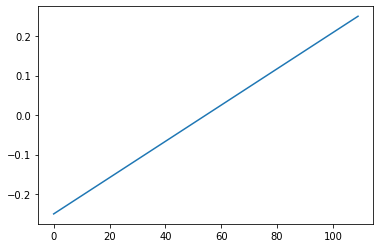

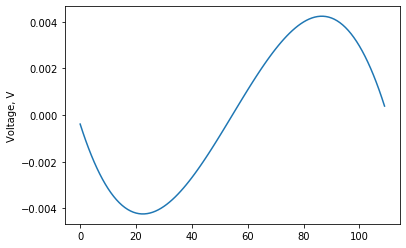

In [12]:
import numpy as np
from matplotlib import pyplot as plt

# Step 1 - an automatically scaling poisson matrix.
# Let's assume we are trying to find the voltage along a 1m space with varying charge densities. 
# This time, instead of hard coding our poisson matrix, we will make one that scales to as many nodes as you want.

nodes = 110 #Number of nodes we will have in our simulation domain.
length = 1 #m, the length of our domain.
a = length/(nodes-1) # The step size 'a', in metres. 

# Create our scaling poisson matrix; we know the format is [zeros] 1, -2, 1 [zeros]
Poisson_Matrix = np.zeros((nodes,nodes)) # Create an empty matrix to begin with
for i in range(nodes):
    # We are going to construct our matrix row by row
    # we know it's mostly zeros, so let's start with a row of zeros
    Blank_row = np.zeros(nodes)
    # We can then replace the relevant segment of the blank row with 1 or -2 as required:
    if i == 0:
        #This is our first row, only a -2, 1 before the zeros
        Blank_row[i] = -2
        Blank_row[i+1] = 1
    elif i == nodes-1:
        #This is our last row; only zeros, then 1, -2
        Blank_row[i-1] = 1
        Blank_row[i] = -2
    else:
        #These are our middle rows, zeros on either side and then 1, -2, 1
        Blank_row[i-1] = 1
        Blank_row[i] = -2
        Blank_row[i+1] = 1
    
    # Put this newly generated row in our matrix
    Poisson_Matrix[i,:] = Blank_row

# Print the matrix to examine it ourselves
print(Poisson_Matrix)

# Now, we need to generate our rho vector.
# I am going to make a rho = 0.5x, where x is the distance from the centre of our system.
# Try a bunch of different rhos yourself!
centre = length/2
rho = np.zeros(nodes)
for i in range(nodes):
    x = i*a - centre # Find our position relative to centre
    rho[i] = 0.5*x
    
plt.plot(rho)

# Before we solve this, we are going to need to add in the -a squared / epsilon term to our rho.
# Epsilon is where we input our material properties; it's not going to change for our simulations so I will set it to be '1'
eps = 1
rho_mod = rho*-1*a**2*eps

# Finally, let's generate a solution via matrix inversion. As always, this is quite a slow method (but we're lazy :) )
V = np.linalg.solve(Poisson_Matrix, rho_mod)
plt.figure()
plt.plot(V)
plt.ylabel('Voltage, V')

#### Important: Have a play around with the node number and note any changes; the simulation should get smoother (duh) and the values of the result should NOT change (if they do change, you have done something wrong with your scaling!) #### 

Next up: Adding a Dirchlett or Neumann Boundary Condition. I will copy-paste the code from above so we don't have to keep re-initialising our matrix. 

[[-2.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]


Text(0, 0.5, 'Voltage, V')

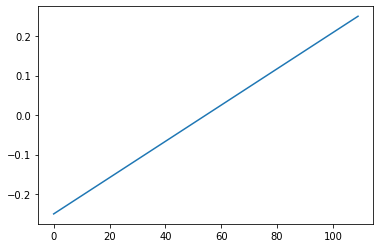

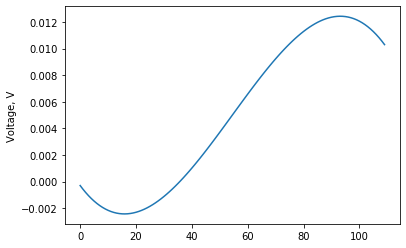

In [16]:
# Step 1 - an automatically scaling poisson matrix.
# Let's assume we are trying to find the voltage along a 1m space with varying charge densities. 
# This time, instead of hard coding our poisson matrix, we will make one that scales to as many nodes as you want.

nodes = 110 #Number of nodes we will have in our simulation domain.
length = 1 #m, the length of our domain.
a = length/(nodes-1) # The step size 'a', in metres. 

# MODIFICATION 1 - DIRCHLETT BOUNDARY CONDITIONS
V_start = 0
V_end = 0.01


# Create our scaling poisson matrix; we know the format is [zeros] 1, -2, 1 [zeros]
Poisson_Matrix = np.zeros((nodes,nodes)) # Create an empty matrix to begin with
for i in range(nodes):
    # We are going to construct our matrix row by row
    # we know it's mostly zeros, so let's start with a row of zeros
    Blank_row = np.zeros(nodes)
    # We can then replace the relevant segment of the blank row with 1 or -2 as required:
    if i == 0:
        #This is our first row, only a -2, 1 before the zeros
        Blank_row[i] = -2
        Blank_row[i+1] = 1
    elif i == nodes-1:
        #This is our last row; only zeros, then 1, -2
        Blank_row[i-1] = 1
        Blank_row[i] = -2
    else:
        #These are our middle rows, zeros on either side and then 1, -2, 1
        Blank_row[i-1] = 1
        Blank_row[i] = -2
        Blank_row[i+1] = 1
    
    # Put this newly generated row in our matrix
    Poisson_Matrix[i,:] = Blank_row

# Print the matrix to examine it ourselves
print(Poisson_Matrix)

# Now, we need to generate our rho vector.
# I am going to make a rho = 0.5x, where x is the distance from the centre of our system.
# Try a bunch of different rhos yourself!
centre = length/2
rho = np.zeros(nodes)
for i in range(nodes):
    x = i*a - centre # Find our position relative to centre
    rho[i] = 0.5*x

plt.plot(rho)


# Before we solve this, we are going to need to add in the -a squared / epsilon term to our rho.
# Epsilon is where we input our material properties; it's not going to change for our simulations so I will set it to be '1'
eps = 1
rho_mod = rho*-1*a**2*eps

# IMPLEMENT OUR DIRCHLETT BOUNDARY CONDITIONS
rho_mod[0] = rho_mod[0] - V_start
rho_mod[-1] = rho_mod[-1] - V_end

# Finally, let's generate a solution via matrix inversion. As always, this is quite a slow method (but we're lazy :) )
V = np.linalg.solve(Poisson_Matrix, rho_mod)
plt.figure()
plt.plot(V)
plt.ylabel('Voltage, V')

[[-1.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]


Text(0, 0.5, 'Voltage, V')

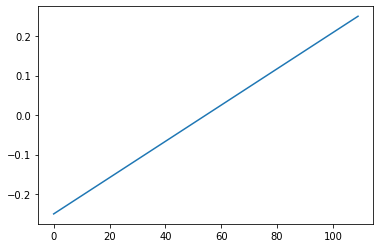

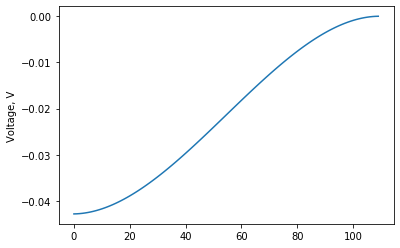

In [39]:
# NEUMANN BOUNDARY CONDITIONS
# Let's assume we are trying to find the voltage along a 1m space with varying charge densities. 
# This time, instead of hard coding our poisson matrix, we will make one that scales to as many nodes as you want.

nodes = 110 #Number of nodes we will have in our simulation domain.
length = 1 #m, the length of our domain.
a = length/(nodes-1) # The step size 'a', in metres. 



# Create our scaling poisson matrix; we know the format is [zeros] 1, -2, 1 [zeros]
Poisson_Matrix = np.zeros((nodes,nodes)) # Create an empty matrix to begin with
for i in range(nodes):
    # We are going to construct our matrix row by row
    # we know it's mostly zeros, so let's start with a row of zeros
    Blank_row = np.zeros(nodes)
    # We can then replace the relevant segment of the blank row with 1 or -2 as required:
    if i == 0:
        #This is our first row, only a -2, 1 before the zeros
        Blank_row[i] = -2
        Blank_row[i+1] = 1
    elif i == nodes-1:
        #This is our last row; only zeros, then 1, -2
        Blank_row[i-1] = 1
        Blank_row[i] = -2
    else:
        #These are our middle rows, zeros on either side and then 1, -2, 1
        Blank_row[i-1] = 1
        Blank_row[i] = -2
        Blank_row[i+1] = 1
    
    # Put this newly generated row in our matrix
    Poisson_Matrix[i,:] = Blank_row

# MODIFICATION 2- NEUMANN BOUNDARY CONDITIONS
# Hard coding a gradient of zero at the edges:
Poisson_Matrix[0,0] = -1
#Poisson_Matrix[-1,-1] = -1
# Note that the SPECIFIC condition of zero-at-the-edges results in a singular matrix;
# We get around this by only specifying ONE of the edge points to be a gradient zero (and it propagates to the other side)

# Print the matrix to examine it ourselves
print(Poisson_Matrix)

# Now, we need to generate our rho vector.
# I am going to make a rho = 0.5x, where x is the distance from the centre of our system.
# Try a bunch of different rhos yourself!
centre = length/2
rho = np.zeros(nodes)
for i in range(nodes):
    x = i*a - centre # Find our position relative to centre
    rho[i] = 0.5*x

plt.plot(rho)


# Before we solve this, we are going to need to add in the -a squared / epsilon term to our rho.
# Epsilon is where we input our material properties; it's not going to change for our simulations so I will set it to be '1'
eps = 1
rho_mod = rho*-1*a**2*eps


# Finally, let's generate a solution via matrix inversion. As always, this is quite a slow method (but we're lazy :) )
V = np.linalg.solve(Poisson_Matrix, rho_mod)
plt.figure()
plt.plot(V)
plt.ylabel('Voltage, V')

From here; Try to make the gradient not hard coded! I want you to be able to input any gradient for the edges and have it modify the poisson matrix accordingly. Write out the equations (specifically the expression for the gradient at point 1, as a function of V0 and V1), and have a play around to see how you could do it.